<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/dbda/ch08-basic-models/coin_factory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
from runpy import run_path

az.style.use('arviz-darkgrid')
%matplotlib inline

In [57]:
!rm -rf data-science-hw
!git clone https://github.com/ctarrington/data-science-hw.git

base_path = './data-science-hw/dbda/ch08-basic-models/'
Coin = run_path(base_path+'/mint.py').get('Coin')
Mint = run_path(base_path+'/mint.py').get('Mint')


Cloning into 'data-science-hw'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 130 (delta 59), reused 16 (delta 3), pack-reused 0
Receiving objects: 100% (130/130), 617.54 KiB | 18.16 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [58]:
coins_per_mint = 3
mint = Mint(0.3, 0.05)
coins = mint.make_coins(coins_per_mint)

mint = Mint(0.7, 0.05)
mint.make_coins(coins_per_mint, coins)

In [59]:
flips = []
for ctr in range(1000):
  for coin in coins:
    coin.flip(flips)

In [60]:
df = pd.DataFrame(flips, columns=['mint_id', 'coin_id', 'flip'])
df.head()

,mint_id,coin_id,flip
0,0,0,1
1,0,1,0
2,0,2,1
3,1,3,1
4,1,4,0


In [61]:
flips = df['flip'].values
idx = df['mint_id'].values
groups = len(np.unique(idx))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:05<00:00, 455.21it/s]


       mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
θ[0]  0.305  0.008   0.288    0.320  ...  3389.0    3399.0    2564.0    1.0
θ[1]  0.714  0.008   0.698    0.729  ...  3403.0    3402.0    2757.0    1.0

[2 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

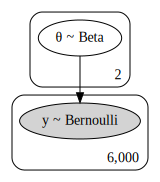

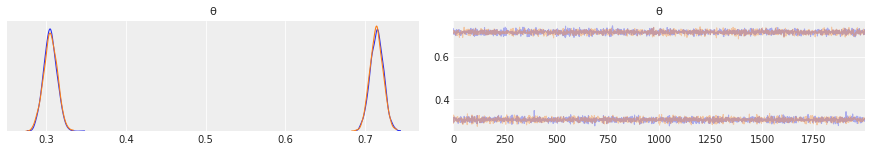

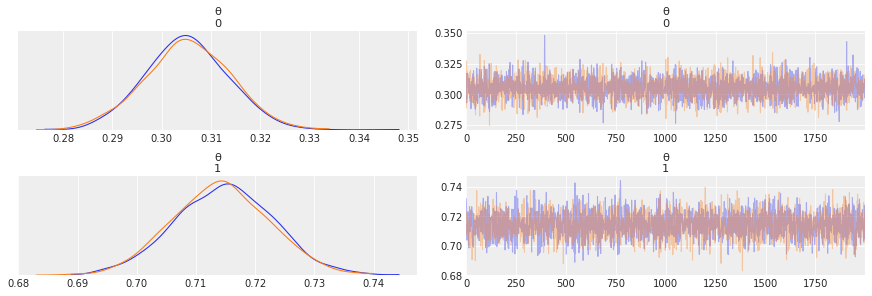

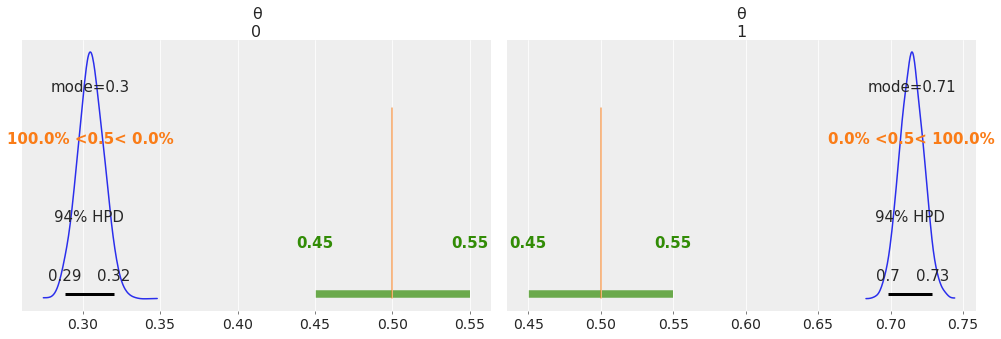

In [62]:
with pm.Model() as model:
  # uniform prior
  θ = pm.Beta('θ', alpha=1., beta=1., shape=groups)
  # likelihood p(y|θ)
  y = pm.Bernoulli('y', p=θ[idx], observed=df['flip'])
  trace = pm.sample(2000, random_seed=123)
  print(az.summary(trace))
  pm.traceplot(trace)
  az.plot_trace(trace)
  az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5, point_estimate='mode')

pm.model_to_graphviz(model)